In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("fruits.csv")

In [3]:
df.head()

,target,weight,color
0,apple,91.234258,red
1,apple,125.134927,red
2,orange,101.313929,orange
3,apple,102.218174,green
4,apple,89.982126,red


In [4]:
color = pd.get_dummies(df.color)

In [5]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df.target = le1.fit_transform(df.target)
df.color = le1.fit_transform(df.color)

In [6]:
df

,target,weight,color
0,0,91.234258,2
1,0,125.134927,2
2,1,101.313929,1
3,0,102.218174,0
4,0,89.982126,2
...,...,...,...
9995,0,81.061794,2
9996,1,90.426004,1
9997,1,92.361074,1
9998,0,126.969072,0


Text(0, 0.5, 'target')

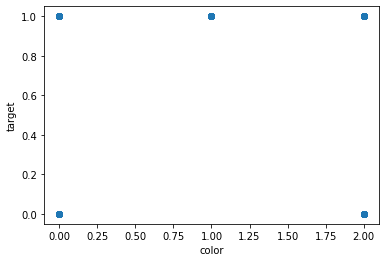

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.color, df.target, "o")
plt.xlabel("color")
plt.ylabel("target")

In [8]:
dfgr = df.groupby(by="color").mean().reset_index()

Text(0, 0.5, 'target')

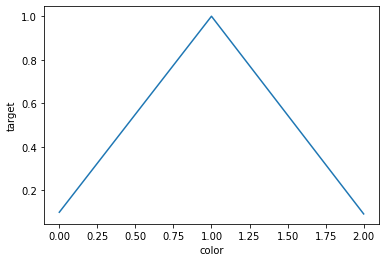

In [9]:
plt.plot(dfgr.color, dfgr.target)
plt.xlabel("color")
plt.ylabel("target")

In [30]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=50, encode='ordinal')
df["W"] = kb.fit_transform(df[["weight"]])

In [31]:
dfgr = df[["W","target"]].groupby(by="W").mean().reset_index()

Text(0, 0.5, 'target')

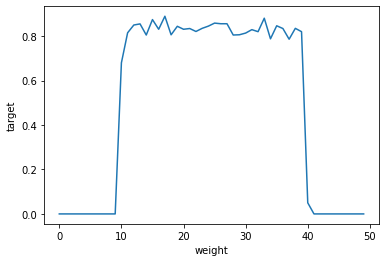

In [32]:
plt.plot(dfgr.W, dfgr.target)
plt.xlabel("weight")
plt.ylabel("target")

In [13]:
df.corr()

,target,weight,color,W
target,1.000000,0.005081,-0.142332,0.004387
weight,0.005081,1.000000,-0.001345,0.933685
color,-0.142332,-0.001345,1.000000,0.000806
W,0.004387,0.933685,0.000806,1.000000


In [14]:
df = pd.concat([df, color], axis=1)

In [15]:
df

,target,weight,color,W,green,orange,red
0,0,91.234258,2,2.0,False,False,True
1,0,125.134927,2,8.0,False,False,True
2,1,101.313929,1,5.0,False,True,False
3,0,102.218174,0,5.0,True,False,False
4,0,89.982126,2,2.0,False,False,True
...,...,...,...,...,...,...,...
9995,0,81.061794,2,1.0,False,False,True
9996,1,90.426004,1,2.0,False,True,False
9997,1,92.361074,1,2.0,False,True,False
9998,0,126.969072,0,8.0,True,False,False


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df[["weight","green","orange","red"]]
y = df.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
from sklearn.model_selection import KFold
scores = []
pred_test = np.zeros((X_test.shape[0], 5))
kf = KFold(n_splits=5)
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_tr = X_train.iloc[train_index, :]
    X_val = X_train.iloc[test_index, :]
    y_tr = y_train.iloc[train_index]
    y_val = y_train.iloc[test_index]
    clf.fit(X_tr, y_tr)
    pred_tr = clf.predict_proba(X_tr)[:,1]
    pred_val = clf.predict_proba(X_val)[:,1]
    pred_test[:,i] = clf.predict_proba(X_test)[:,1]
    score_tr = roc_auc_score(y_tr, pred_tr)
    score_val = roc_auc_score(y_val, pred_val)
    scores.append(score_val)
    print(score_tr, score_val)
#Нашли оптимальные параметры и обучаем модель с ними на всем train
clf.fit(X_tran, y_train)
#или усредняем
pred_tst = pred_test.mean(axis=1)


0.9527089472025012 0.9356906666666667
0.9480805743654654 0.953533189435042
0.9494698956596564 0.9481723813863415
0.9490532081455401 0.9496616717896176
0.9480432566369714 0.9440443420182234


NameError: name 'X_tran' is not defined

In [ ]:
from scipy.stats import bootstrap
bootstrap([scores], np.mean).confidence_interval.low


In [ ]:
clf.fit(X_train,y_train)

In [ ]:
pred_train = clf.predict_proba(X_train)[:,1]
pred_test = clf.predict_proba(X_test)[:,1]

In [ ]:
score_train = roc_auc_score(y_train, pred_train)
score_test = roc_auc_score(y_test, pred_test)
score_train, score_test

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=20, encode='onehot-dense')
W = kb.fit_transform(df[["weight"]])

In [ ]:
df = pd.concat([df, pd.DataFrame(W)], axis=1)

In [ ]:
df

In [ ]:
X = df.drop(["target", "weight", "color"], axis = 1)
y = df.target

In [ ]:
X

In [ ]:
df.corr()

In [ ]:
df[["green","orange","red"]].mean()